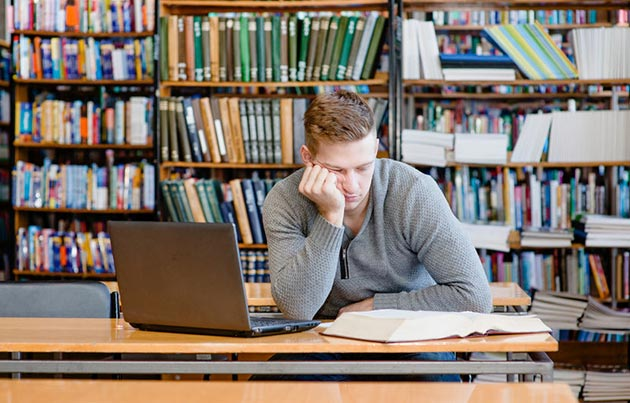

# It's a work in progress. 


# I will try to add more valuable information and get some insight about the dataset later on


# For now please comment if you liked it or have a suggestion. Thank you in advance. HAPPY CODING EVERYONE

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.sample(7)

In [ ]:
cols = list(df.columns)
new_cols = []
for col in cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [ ]:
df.head()

In [ ]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
#Formating the average_score float values 

In [ ]:
df.head()

In [ ]:
def Grade(AverageScore):
    if (AverageScore >= 80):return 'A'
    if (AverageScore >= 70):return 'B'
    if (AverageScore >= 60):return 'C'
    if (AverageScore >= 50):return 'D'
    if (AverageScore < 50):return 'F'
    
df["letter_grade"] = df.apply(lambda x : Grade(x["average_score"]), axis=1)



> Grade function taken from below source and modified 
<a href=https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis>Source</a>

In [ ]:
df.head()

In [ ]:
# pip install plotly==3.10.0
#!pip install chart-studio

In [ ]:
# plotly
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import iplot

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_race = df['race/ethnicity'].value_counts()[:5]
label = df_race.index
size = df_race.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Race Distribution'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
df_edu = df.parental_level_of_education.value_counts()[:10]

trace = go.Bar(
    x=df_edu.index,
    y=df_edu.values,
    marker=dict(
        color = df_edu.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Parental level of education distribution', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
def PieChart(column, title, limit):
    male = df[df['gender'] == 'male']
    female = df[df['gender'] == 'female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['red',  'navy',  'cyan', 'lightgrey','orange']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .50]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.44, 1]})

    layout = dict(title= title, font=dict(size=15), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.23, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.75, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)


In [ ]:
PieChart('letter_grade', "Letter Grade (Male vs Female)", 6)

**As if we compare all the 5 letters:**
* Female students have more A
* Female students have more B
* Male students have more C
* Male students have more D
* Male students have more F

**It looks like female students are more successful than their male pairs**


In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="race/ethnicity", y="average_score", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Score")
g.legend.set_title("")

**In all ethnic groups female students have the higher scores**

In [ ]:
sns.heatmap(df.corr() ,annot=True)

In [ ]:
sns.jointplot(data=df, x="writing_score", y="math_score", kind="hex")

# Thank you for visiting my kernel


# If you enjoyed my work, please consider upvoting

